# Multilabel Data (one-hot encoded)

In [2]:
import pandas as pd
import numpy as np

In [2]:
# df_faro = pd.read_csv('../Daten/faro_cleaned_v1.txt', 
#                       index_col=0)

In [28]:
df_faro = pd.read_pickle('../Daten/FINAL_faro_cleaned.pkl')

In [29]:
df_faro.sample(4)

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,SOZIALES.,STAAT UND POLITIK.,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories
3850,Alp aus Angst vor Grossraubtieren ohne Schafe\n,D8113D78-BFEB-44A1-A294-6E763D9B73D3,266F07FD-9198-442D-A322-6AC81A5454AE,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
57364,Kriegsfotograf James Nachtwey an der Photo 15\...,CA3C472B-E9D2-41A8-8FEA-541A4BFB7F4D,A8EF6DAD-7EA7-4A74-987E-6E2F9A80A5F1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
34711,FOKUS: Jürg Schmid im Interview\n«10vor10» kon...,70C636CC-F98F-48CA-8765-307351E96D90,2B552ABA-D8E5-4526-8E28-092FBE2E5F44,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
82238,SRF Börse vom 04.07.2018\nDie Welt lebt auf Pu...,60DF0248-FEE1-49E5-8E39-6754EB432780,D1FBBF36-4383-4CF8-8D8D-4BA474C3C19A,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [30]:
'08E0B071-F95D-49D5-B8C7-E8530A5D7F28'.lower()

'08e0b071-f95d-49d5-b8c7-e8530a5d7f28'

In [31]:
df_faro['Web-Text'].sample(1).tolist()

['Wahlschweizerin: die brasilianische Sängerin Mariana Da Cruz\nVor zehn Jahren kam die Brasilianerin Mariana Da Cruz auf Einladung des Musikers und Musikjournalisten Ane Hebeisen nach Bern. Sie blieb und startete das gemeinsame Bandprojekt «Da Cruz». Seither mixt sie brasilianische Stiltraditionen mit Elektro, Reggae und Funk zu einem unverwechselbaren Sound. Die nostalgische «saudade», die brasilianische Sehnsucht nach der alten Heimat, ist nichts für die 41-jährige Sängerin, im Gegenteil: Sie geniesst die schöpferischen Freiheiten hier und versteht sich als Botschafterin eines modernen, dynamischen Brasiliens.']

In [32]:
df_faro.columns[3:]

Index(['ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
       'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
       'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
       'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
       'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
       'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.', 'Categories'],
      dtype='object')

In [6]:
import os
import re
import requests
import sys
from num2words import num2words
import os
import pandas as pd
import numpy as np
import tiktoken
from openai import AzureOpenAI

Next we'll perform some light data cleaning by removing redundant whitespace and cleaning up the punctuation to prepare the data for tokenization.

In [34]:
pd.options.mode.chained_assignment = None #https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#evaluation-order-matters

# s is input text
def normalize_text(s, sep_token = " \n "):
    s = re.sub(r'\s+',  ' ', s).strip()
    s = re.sub(r". ,","",s)
    # remove all instances of multiple spaces
    s = s.replace("..",".")
    s = s.replace(". .",".")
    s = s.replace("\n", "")
    s = s.strip()
    
    return s

#df_faro['Item-Text']= df_faro["Item-Text"].apply(lambda x : normalize_text(x))
df_faro['Web-Text']= df_faro["Web-Text"].apply(lambda x : normalize_text(x))

In [35]:
df_faro['Web-Text'].sample(4).tolist()

['Bastelvideo: Zwitschermaschine malen So eine Maschine hast du bestimmt noch nie gesehen: Mit einer Kurbel werden vier Vögel zum Zwitschern gebracht. Dem Künstler Paul Klee gefiel diese Idee so sehr, dass er ein Bild gemacht hat und «Zwitschermaschine» getauft hat. Im Video siehst du, wie du deine eigene «Zwitschermaschine» bastelst – mit Gegenständen von Zuhause.',
 'Das ist Stein am Rhein! In der dritten Sendung begrüsst Nik Hartmann in Stein am Rhein folgende Gäste: Gabriel Vetter, die ehemalige «Tagesschau»-Sprecherin Marion Preuss sowie die Buchautorin Verena Schoch Karr. Für die musikalische Unterhaltung sorgen Dodo mit seiner neuen Single «Nagellack» und Lina Button.',
 'Filmfestival Venedig 2020: Frances McDormand Dieses Jahr waren so viele Filme von Frauen im Wettbewerb wie in den letzten fünf Jahren zusammen. Mit dabei, nicht alltägliche Filme und Schauspielerinnen wie Frances McDormand im Film «Nomadland».',
 'Videobeitrag der Tagesschau Spezial vom 17.06.2012']

## Test transformer

Now we need to remove any bills that are too long for the token limit (8192 tokens).

In [36]:
# from transformers import AutoTokenizer

# # Load a pre-trained tokenizer (for example, for BERT)
# tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")

# # Encode text
# encoded_text = tokenizer.encode("Hello world", add_special_tokens=True)

# print(encoded_text)

In [37]:
tokenizer = tiktoken.get_encoding("cl100k_base")
df_faro['n_tokens'] = df_faro['Web-Text'].apply(lambda x: len(tokenizer.encode(x)))
df_faro = df_faro[df_faro.n_tokens<8192]
len(df_faro)

119948

In [38]:
#Example
print(df_faro.sample(random_state=56)['Web-Text'].values[0])
tokens_ = tokenizer.encode(df_faro.sample(random_state=56)['Web-Text'].values[0])
print('')
print('Token Count: ' + str(len(tokens_)))
tokens_

London nicht behindertengerecht Die Paralympics in London wurden noch nie so aufwändig organisiert, wie in London 2012. Die Stadt selbst ist aber weniger behindertengerecht als man annehmen sollte.

Token Count: 49


[40672,
 8969,
 4920,
 531,
 833,
 486,
 14244,
 8574,
 4366,
 5893,
 1331,
 1233,
 304,
 7295,
 48750,
 18268,
 11568,
 779,
 7367,
 86,
 22270,
 343,
 2942,
 88581,
 11,
 13672,
 304,
 7295,
 220,
 679,
 17,
 13,
 8574,
 55192,
 35642,
 6127,
 19649,
 84901,
 4920,
 531,
 833,
 486,
 14244,
 10942,
 893,
 459,
 38160,
 52026,
 13]

In [39]:
df_faro.n_tokens.max()

2480

In [40]:
df_faro.n_tokens.min()

1

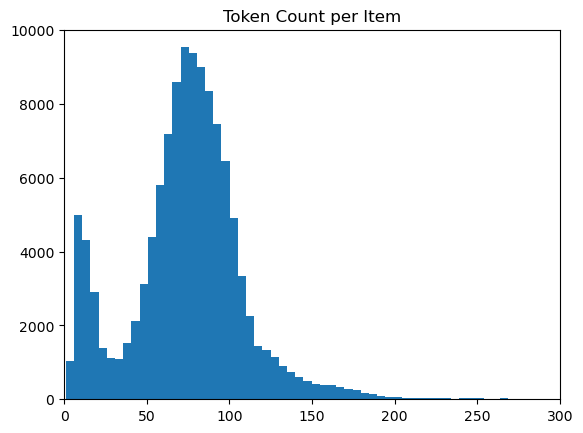

In [41]:
import matplotlib.pyplot as plt

plt.title('Token Count per Item')
plt.hist(df_faro['n_tokens'], bins=500)
plt.xlim(0, 300)
plt.show()

To understand the n_tokens column a little more as well how text ultimately is tokenized, it can be helpful to run the following code:

For our docs we're intentionally truncating the output, but running this command in your environment will return the full text from index zero tokenized into chunks. You can see that in some cases an entire word is represented with a single token whereas in others parts of words are split across multiple tokens.

In [42]:
sample_encode = tokenizer.encode(df_faro.sample(random_state=56)['Web-Text'].values[0]) 
decode = tokenizer.decode_tokens_bytes(sample_encode)
decode

[b'London',
 b' nicht',
 b' behind',
 b'ert',
 b'eng',
 b'ere',
 b'cht',
 b' Die',
 b' Par',
 b'aly',
 b'mp',
 b'ics',
 b' in',
 b' London',
 b' wurden',
 b' noch',
 b' nie',
 b' so',
 b' auf',
 b'w',
 b'\xc3\xa4nd',
 b'ig',
 b' organ',
 b'isiert',
 b',',
 b' wie',
 b' in',
 b' London',
 b' ',
 b'201',
 b'2',
 b'.',
 b' Die',
 b' Stadt',
 b' selbst',
 b' ist',
 b' aber',
 b' weniger',
 b' behind',
 b'ert',
 b'eng',
 b'ere',
 b'cht',
 b' als',
 b' man',
 b' an',
 b'nehmen',
 b' sollte',
 b'.']

In the example below we're calling the embedding model once per every item that we want to embed. When working with large embedding projects you can alternatively pass the model an array of inputs to embed rather than one input at a time. When you pass the model an array of inputs the max number of input items per call to the embedding endpoint is 2048.

# ChatGPT Embeddings

https://openai.com/blog/new-and-improved-embedding-model

In [43]:
df_faro.shape

(119948, 31)

In [18]:
import os
from openai import AzureOpenAI
from getpass import getpass

AZURE_OPENAI_ENDPOINT = getpass('Azure OpenAi Endpoint:')
AZURE_OPENAI_API_KEY = getpass('Azure OpenAi Api Key:')


client = AzureOpenAI(
  azure_endpoint = AZURE_OPENAI_ENDPOINT, 
  api_key=AZURE_OPENAI_API_KEY,  
  api_version="2024-02-01"
)

Azure OpenAi Endpoint:········
Azure OpenAi Api Key:········


In [44]:
from tqdm.notebook import tqdm
tqdm.pandas()

def generate_embeddings(text, model="gpt-embedding"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding


In [45]:
#df_faro_sample = df_faro.sample(100).copy()
df_faro_sample = df_faro.copy()
df_faro_sample['web_embeddings'] = df_faro_sample['Web-Text'].progress_apply(lambda x : generate_embeddings (x, model = 'gpt-embedding')) 
# model should be set to the deployment name you chose when you deployed the text-embedding-ada-002 (Version 2) model

  0%|          | 0/119948 [00:00<?, ?it/s]

In [21]:
df_faro_sample.head()

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories,n_tokens,web_embeddings
58568,LOU KAENA x NATIV – «HUMANA» (Staffel 2) Das o...,760879CA-5A9F-4947-A195-2674D8CB0EEC,79ECB637-5062-4DEE-A896-430B9571B913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",49,"[0.02216055989265442, -0.00661721033975482, 0...."
11069,Besser als Credit Suisse: Mit unserer Bank wir...,DFB9906C-A2D3-4AA6-8006-28C6545270C9,4654F011-76BA-4F8F-ADF5-63951153A439,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",180,"[0.0070493645034730434, -0.002172498032450676,..."
104683,Verseuchtes Trinkwasser in Zug Mitten in der A...,E4BA53FE-3014-400B-84F2-AF18CA2F99C9,19A666B9-CBCB-4303-9084-3ECF2EF18FE0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",63,"[0.026046467944979668, -0.006964085623621941, ..."
89169,Sehenswürdigkeiten in besonderem Licht Zu Silv...,112EFDCC-C784-444B-91CF-395889F12CBF,44B3D1EF-70F3-46DB-B195-781B240ED14C,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",38,"[0.01860712096095085, 0.0030220418702811003, 0..."
55807,Klassenassistenzen an Schulen Schweizweit unte...,E02CD1B8-C8B4-464C-9A63-F9AC793A757D,8041DBA2-9D6D-4240-8948-239A9753CE97,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",56,"[0.013363667763769627, 0.03240462765097618, 0...."


In [21]:
df_faro_sample['Web-Text'].sample(random_state=45).values[0]

'Massiv mehr Asylgesuche im Juli Die Zahl der Asylgesuche in der Schweiz ist innerhalb eines Monats sprunghaft angestiegen, um rund 30 Prozent. Das Bundesamtes für Migration erklärt den Anstieg mit der Eskalation der Lage in Libyen.'

In [22]:
df_faro_sample['n_tokens'].sample(random_state=45).values[0]

65

In [23]:
len(df_faro_sample['web_embeddings'].sample(random_state=44).values[0])

1536

In [24]:
df_faro_sample['web_embeddings'].sample(random_state=44).values[0]

[0.014289582148194313,
 -0.02839779108762741,
 0.00498127331957221,
 -0.009781173430383205,
 -0.031377486884593964,
 -0.0033942614682018757,
 -0.013227256014943123,
 -0.00972287543118,
 -0.00479666143655777,
 -0.043063074350357056,
 0.015325997956097126,
 0.005133496597409248,
 -0.014030477963387966,
 -0.007760162930935621,
 0.0035594403743743896,
 0.03109247237443924,
 0.0447213388979435,
 -0.031403396278619766,
 0.024290993809700012,
 -0.018331604078412056,
 -0.011484782211482525,
 0.001436407444998622,
 -0.004670348484069109,
 -0.01137466263025999,
 -0.013032928109169006,
 0.0032549931202083826,
 0.02966739982366562,
 -0.029511937871575356,
 -0.022930698469281197,
 0.015015073120594025,
 -0.015066893771290779,
 -0.013304986990988255,
 -0.007112402934581041,
 0.011173857375979424,
 -0.02579379640519619,
 -0.03510858491063118,
 -0.007572312373667955,
 -0.007585267536342144,
 0.02826823852956295,
 -0.001229124260134995,
 0.005301914177834988,
 0.014859611168503761,
 0.02241249009966850

In [46]:
df_faro_sample.to_pickle('../Daten/FINAL_faro_cleaned_embeddings_full.pkl')

In [47]:
#df_faro_sample
df_faro_sample.sample(24)

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories,n_tokens,web_embeddings
94243,Strassenkinder in Afghanistan Der afghanische ...,E70182DA-AFEC-4478-9938-804B32C2694C,F87504C8-017F-4D99-A471-FCECA443E627,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",79,"[0.002547679003328085, 0.00023823561787139624,..."
41622,Gekämpft: Pippa Middleton beim «Inferno»-Skire...,E18E6041-9FF5-4A42-B074-8A13DC70C758,EB24453D-8BE8-45D6-B5C9-88F2D83F044D,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",109,"[-0.018728069961071014, 0.0031376020051538944,..."
20680,Dem Nebel entfliehen Seit Tagen hockt der Nebe...,F084002D-A82A-420D-842C-CACDEF439387,70DC55C9-F000-467A-98E0-1B85F5BA85EE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",60,"[0.021093379706144333, 0.007245516870170832, 0..."
6585,Auch Lehrer*innen müssen lernen Für viele Lehr...,7222D185-C03C-4586-BAB4-69A8C3A65BD1,D725BA16-C534-42E5-8F84-4ED8F7F0F9E5,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",131,"[0.015774715691804886, 0.009979411959648132, -..."
110304,Wie gefährlich ist China? Chinas Führung greif...,FC73E2D8-D6FA-4656-9F00-D81EA715CF14,D5835693-4238-44E9-968D-353B06CFB009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",91,"[0.02215781807899475, -0.017131684347987175, 0..."
52120,Jessica Chastain: Schlagkräftig vor und hinter...,9BEF63CF-12C0-49F8-BAD8-4B836255A136,1A536553-CA1D-47B0-A53B-FB889FCC1151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",121,"[-0.00468913558870554, -0.009500737302005291, ..."
22813,Deutsche Aufarbeitungs-Kommission orientiert s...,77699F92-6961-4722-B487-EB73EF356319,55C4C769-9A3C-4236-B0E9-2725DCE7C513,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",81,"[0.008872891776263714, 0.01454042736440897, -0..."
10662,Bern: Zibelewuche statt Zibelemärit Zum ersten...,AA5CA558-80D0-407F-91AF-457E67087EF9,E2140833-90E9-4F25-BCD2-225E82B336F8,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",64,"[0.0007033708388917148, -0.024068204686045647,..."
101018,US-Wahlkampf kommt ins Rollen Die Wirtschaft i...,AD48CC24-DDD8-4620-B9F2-3EAD6108DFBC,E1E37957-32C0-4EB4-BC02-11CD550902D5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",53,"[-0.006007160525768995, -0.030378976836800575,..."
31400,"Erfolgreiche Windturbine Ein Windrad, das leis...",4A07E95D-4F1C-4063-9014-7CCE8D2C5BC0,F00BB993-2BAB-4859-B326-4E1DC6C85BD4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",88,"[-0.0026134608779102564, -0.010388952679932117..."


## Store Balanced df with Embeddings

In [1]:
import pandas as pd
df_faro_sample = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_full.pkl')
df_faro_balanced = pd.read_pickle('../Daten/FINAL_faro_cleaned_balanced.pkl')

In [3]:
# Example
df_faro_sample[df_faro_sample['Program-WebCmsId']=='89AE2D6E-4D40-4C53-8450-2BA6B7358211']

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories,n_tokens,web_embeddings
1670,75 Jahre Nato 12 Staaten haben 1949 den Nordat...,793EA563-042F-41BD-B7A8-16AFC8DE19F7,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",84,"[-0.00493658846244216, -0.011675671674311161, ..."
2483,Abstimmung Stromversorgungsgesetz: Argumente d...,AB8F2613-3808-4562-9B9B-9030EC7907C6,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",105,"[0.021854238584637642, -0.013178691267967224, ..."
10488,Berlin: Fliegerbombe aus dem zweiten Weltkrieg...,1D4DE079-7A7C-4CB1-B500-AE3F5B2DB28E,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",84,"[-0.002873511053621769, -0.008576476015150547,..."
26413,Dokumentarfilm «Echte Schweizer» im Kino In «E...,F288AC54-CCA8-43F2-BFE9-0F514B11DF9C,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",65,"[0.015613097697496414, -0.009509319439530373, ..."
51066,Israel: Benny Gantz fordert Neuwahlen Die Umfr...,6D91F3D5-4EF9-4AE4-B572-ACD738F4854E,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",60,"[-0.020443810150027275, -0.017094697803258896,..."
95996,Swiss Steel: Aktionäre stimmen für Kapitalerhö...,2F191750-BEB4-47C1-A821-5AD6607B53F5,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",89,"[-0.015614534728229046, -0.014111393131315708,..."
96005,Swiss fliegt trotz Sicherheitsbedenken der Cre...,524B9092-E8A4-4C4A-85BA-3B556087E9C6,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",93,"[-0.001517775934189558, -0.0342961810529232, -..."
106448,WCK wirft Israel gezielte Tötung von Mitarbeit...,90BD3EAA-C295-4102-9C94-E6FEA11FB496,89AE2D6E-4D40-4C53-8450-2BA6B7358211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",75,"[-0.003844684921205044, -0.006260489579290152,..."


In [22]:
import tiktoken

tokenizer = tiktoken.get_encoding("cl100k_base")
sample_encode = tokenizer.encode(df_faro_sample.iloc[10488, :]['Web-Text']) 
decode = tokenizer.decode_tokens_bytes(sample_encode)
decode

[b'Berlin',
 b':',
 b' Fl',
 b'ie',
 b'ger',
 b'b',
 b'om',
 b'be',
 b' aus',
 b' dem',
 b' zwe',
 b'iten',
 b' Welt',
 b'k',
 b'rieg',
 b' ist',
 b' ents',
 b'ch',
 b'\xc3\xa4r',
 b'ft',
 b' Spe',
 b'zial',
 b'isten',
 b' haben',
 b' in',
 b' Berlin',
 b' eine',
 b' rund',
 b' ',
 b'100',
 b' Kil',
 b'ogram',
 b'm',
 b' schw',
 b'ere',
 b' Fl',
 b'ie',
 b'ger',
 b'b',
 b'om',
 b'be',
 b' aus',
 b' dem',
 b' zwe',
 b'iten',
 b' Welt',
 b'k',
 b'rieg',
 b' uns',
 b'ch',
 b'\xc3\xa4d',
 b'lich',
 b' gemacht',
 b'.',
 b' R',
 b'und',
 b' ',
 b'670',
 b'0',
 b' Menschen',
 b' mus',
 b'sten',
 b' zu',
 b'vor',
 b' ihr',
 b' Z',
 b'uh',
 b'ause',
 b' im',
 b' Berlin',
 b'er',
 b' Bez',
 b'irk',
 b' in',
 b' Charl',
 b'otten',
 b'burg',
 b'-W',
 b'ilm',
 b'ers',
 b'dorf',
 b' ver',
 b'lassen',
 b'.']

In [21]:
df_faro_sample.iloc[10488, :]['Web-Text']

'Berlin: Fliegerbombe aus dem zweiten Weltkrieg ist entschärft Spezialisten haben in Berlin eine rund 100 Kilogramm schwere Fliegerbombe aus dem zweiten Weltkrieg unschädlich gemacht. Rund 6700 Menschen mussten zuvor ihr Zuhause im Berliner Bezirk in Charlottenburg-Wilmersdorf verlassen.'

In [25]:
df_faro_sample.iloc[10488, :]['web_embeddings']


[-0.002873511053621769,
 -0.008576476015150547,
 0.003013841575011611,
 -0.018027570098638535,
 0.003013841575011611,
 -0.003756287507712841,
 -0.03179953619837761,
 0.0014432824682444334,
 -0.011970515362918377,
 -0.01573006622493267,
 0.013902506791055202,
 0.014920718036592007,
 -0.007865033112466335,
 0.012760281562805176,
 0.004164224956184626,
 0.016421927139163017,
 0.05130220577120781,
 -0.008576476015150547,
 -0.021839337423443794,
 -0.008119585923850536,
 -0.0073624541983008385,
 -0.005825345870107412,
 0.028588254004716873,
 -0.00028596410993486643,
 -0.018849970772862434,
 -0.019189374521374702,
 0.019646264612674713,
 -0.021904606372117996,
 0.0011756755411624908,
 -0.006057054735720158,
 -0.011689853854477406,
 -0.005371719598770142,
 -0.0457150973379612,
 0.010958829894661903,
 -0.025559725239872932,
 0.007466886192560196,
 -0.006285499315708876,
 -0.0003587809333112091,
 -0.008517732843756676,
 0.021095259115099907,
 0.008393719792366028,
 0.021421609446406364,
 0.02421

In [39]:
df_faro_balanced_emmbeddings = df_faro_sample[df_faro_sample['Item-WebCmsId'].isin(df_faro_balanced['Item-WebCmsId'].tolist())].reset_index(drop=True)

In [40]:
df_faro_balanced_emmbeddings.to_pickle('../Daten/FINAL_faro_cleaned_embeddings_balanced.pkl')

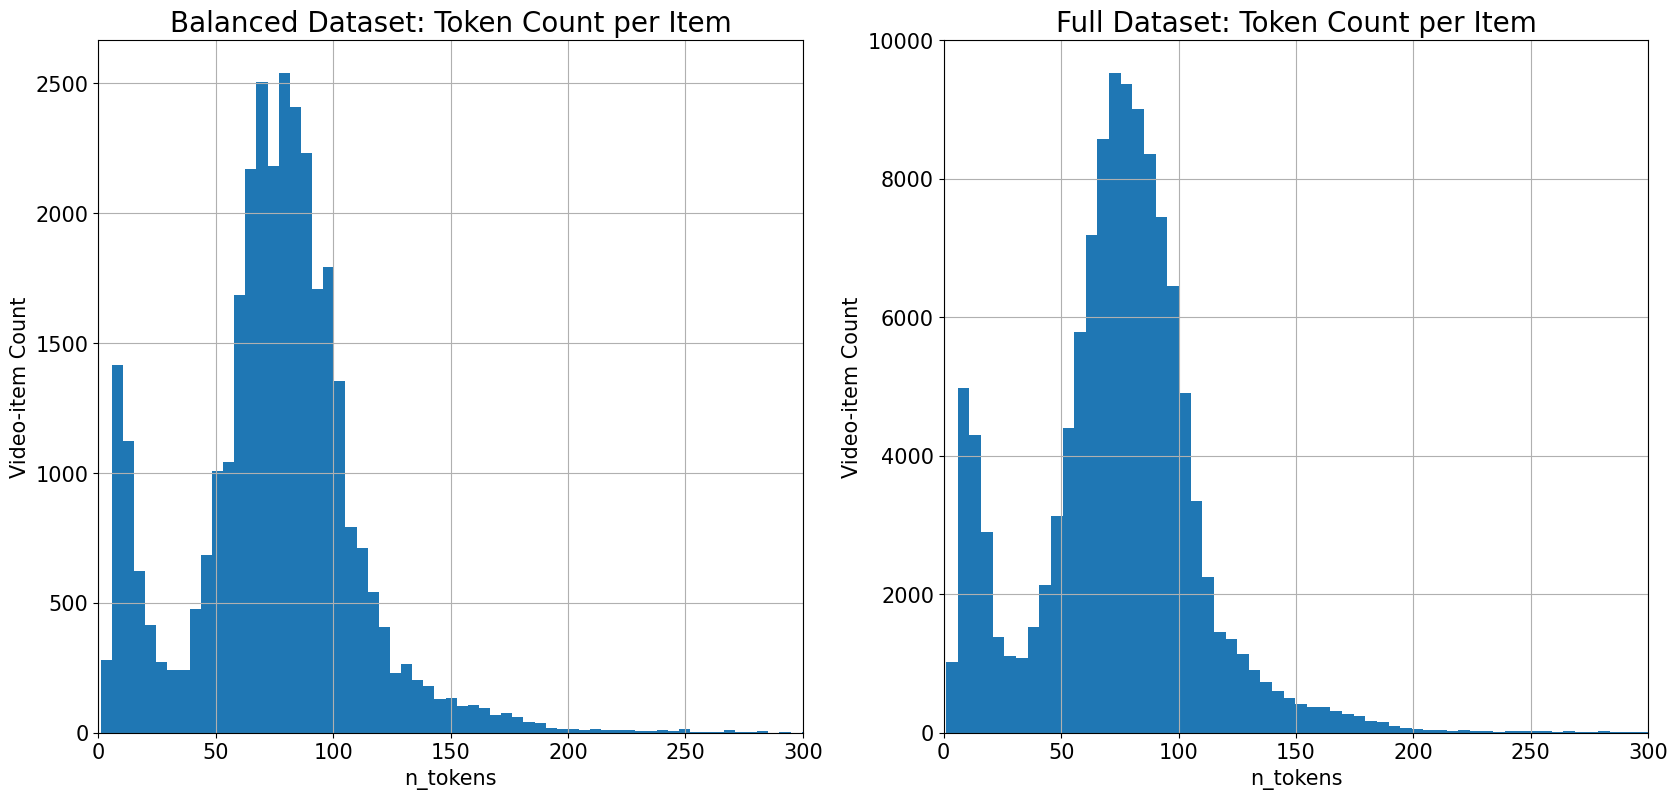

In [64]:
import matplotlib.pyplot as pl

plt.rcParams["figure.figsize"] = (20, 9)  # Width is doubled for two plots
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)

# Plot on the first subplot
axs[0].hist(df_faro_balanced_emmbeddings['n_tokens'], bins=500)
axs[0].set_title('Balanced Dataset: Token Count per Item', fontsize=20)
axs[0].set_ylabel('Video-item Count', fontsize=15)
axs[0].set_xlabel('n_tokens', fontsize=15)
#axs[0].legend()
axs[0].set_xlim(0, 300)
axs[0].grid()

# Plot on the second subplot (duplicate of the first)
axs[1].hist(df_faro_sample['n_tokens'], bins=500)
axs[1].set_title('Full Dataset: Token Count per Item', fontsize=20)
axs[1].set_ylabel('Video-item Count', fontsize=15)
axs[1].set_xlabel('n_tokens', fontsize=15)
#axs[1].legend()
axs[1].set_xlim(0, 300)
axs[1].grid()

for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=15)
    
# Display the plot
plt.show()